## Loading Libraries
All Python capabilities are not loaded to our working environment by default (even they are already installed in your system). So, we import each and every library that we want to use.

We chose alias names for our libraries for the sake of our convenience (numpy --> np and pandas --> pd, tensorlow --> tf).

Note: You can import all the libraries that you think will be required or can import it as you go along.

In [1]:
import pandas as pd                                     # Data analysis and manipultion tool
import numpy as np                                      # Fundamental package for linear algebra and multidimensional arrays
import tensorflow as tf                                 # Deep Learning Tool
import os                                               # OS module in Python provides a way of using operating system dependent functionality
import cv2                                              # Library for image processing
from sklearn.model_selection import train_test_split    # For splitting the data into train and validation set
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import cv2
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Loading and preparing training data

In [2]:
import cv2

In [3]:
labels = pd.read_csv("content/eye_gender_data/Training_set.csv") # loading the labels
file_paths = [[fname, "content/eye_gender_data/train/" + fname] for fname in labels['filename']]
images = pd.DataFrame(file_paths, columns=['filename', 'filepaths'])

In [4]:
file_paths[0:5]

[['Image_1.jpg', 'content/eye_gender_data/train/Image_1.jpg'],
 ['Image_2.jpg', 'content/eye_gender_data/train/Image_2.jpg'],
 ['Image_3.jpg', 'content/eye_gender_data/train/Image_3.jpg'],
 ['Image_4.jpg', 'content/eye_gender_data/train/Image_4.jpg'],
 ['Image_5.jpg', 'content/eye_gender_data/train/Image_5.jpg']]

In [5]:
labels.head()

,filename,label
0,Image_1.jpg,male
1,Image_2.jpg,female
2,Image_3.jpg,female
3,Image_4.jpg,female
4,Image_5.jpg,male


In [6]:
images.head()

,filename,filepaths
0,Image_1.jpg,content/eye_gender_data/train/Image_1.jpg
1,Image_2.jpg,content/eye_gender_data/train/Image_2.jpg
2,Image_3.jpg,content/eye_gender_data/train/Image_3.jpg
3,Image_4.jpg,content/eye_gender_data/train/Image_4.jpg
4,Image_5.jpg,content/eye_gender_data/train/Image_5.jpg


In [7]:
train_data = pd.merge(images, labels, how = 'inner', on = 'filename')

In [8]:
train_data.head()

,filename,filepaths,label
0,Image_1.jpg,content/eye_gender_data/train/Image_1.jpg,male
1,Image_2.jpg,content/eye_gender_data/train/Image_2.jpg,female
2,Image_3.jpg,content/eye_gender_data/train/Image_3.jpg,female
3,Image_4.jpg,content/eye_gender_data/train/Image_4.jpg,female
4,Image_5.jpg,content/eye_gender_data/train/Image_5.jpg,male


In [9]:
train_data.shape[0]

9220

In [10]:
train_data['filepaths'][0]

'content/eye_gender_data/train/Image_1.jpg'

In [11]:
data = [] # initialize an empty numpy array
image_size = 100 # image size taken is 100 here. one can take other size too
for i in range(train_data.shape[0]):

  img_array = cv2.imread(train_data['filepaths'][i], cv2.IMREAD_GRAYSCALE) # converting the image to gray scale
# This code reads an image file and converts it to a grayscale image represented as a NumPy array.
#The function cv2.imread is used to read an image file and return the contents of the file as a NumPy array. 
# The first argument to the function is the file path of the image file. The second argument specifies 
# how the image should be read. In this case, the image is being read in grayscale 
# mode by specifying the flag cv2.IMREAD_GRAYSCALE.
#The resulting NumPy array will have a shape (image_height, image_width) for a 2D grayscale image, 
# or (image_height, image_width, num_channels) for a 2D image with multiple channels (e.g. RGB). 
# The values in the array will be integers representing the pixel intensities of the image.
# Read the image in grayscale mode
# img = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

  new_img_array = cv2.resize(img_array, (image_size, image_size)) # resizing the image array
  data.append([new_img_array, train_data['label'][i]])

In [14]:
train_data['label'][0]

'male'

## Data Pre-processing
It is necessary to bring all the images in the same shape and size, also convert them to their pixel values because all machine learning or deep learning models accepts only the numerical data. Also we need to convert all the labels from categorical to numerical values.

[array([[188, 188, 189, ..., 176, 175, 175],
       [189, 189, 188, ..., 174, 173, 172],
       [190, 189, 188, ..., 168, 167, 167],
       ...,
       [133, 137, 144, ..., 168, 167, 166],
       [134, 138, 145, ..., 165, 164, 163],
       [135, 139, 146, ..., 163, 162, 162]], dtype=uint8), 'male']


Text(0.5, 1.0, 'male')

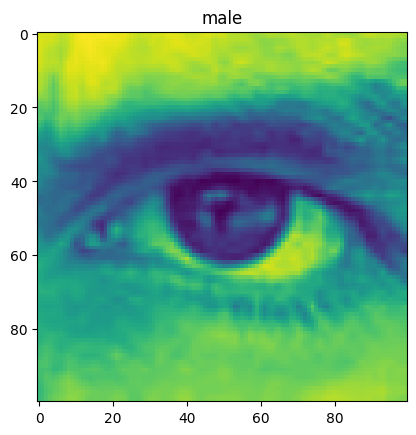

In [15]:
print(data[0])
plt.imshow(data[0][0])
plt.title(data[0][1])

In [16]:
data2 = [] # initialize an empty numpy array
image_size = 100 # image size taken is 100 here. one can take other size too
for i in range(train_data.shape[0]):

    img_array = cv2.imread(train_data['filepaths'][i], cv2.IMREAD_GRAYSCALE) # converting the image to gray scale

    new_img_array = cv2.resize(img_array, (image_size, image_size)) # resizing the image array
    data2.append([new_img_array])

In [17]:
new_img_array

array([[225, 225, 225, ..., 160, 160, 160],
       [225, 225, 225, ..., 154, 154, 154],
       [226, 226, 226, ..., 145, 146, 146],
       ...,
       [210, 208, 206, ..., 222, 222, 222],
       [211, 209, 207, ..., 221, 221, 221],
       [212, 210, 209, ..., 221, 221, 221]], dtype=uint8)

In [18]:
train_im = np.array(data2,dtype='uint8')
# This means that the elements in the array will be integers ranging from 0 to 255 (inclusive).(8-bit integer.)
train_im.shape

(9220, 1, 100, 100)

In [19]:
train_im = train_im.reshape(9220,100,100,1)
print(train_im.shape)
print(train_im.dtype)

(9220, 100, 100, 1)
uint8


In [20]:
for i in range(len(data)):
    a=pd.DataFrame(data)
    a.columns= ['images','gender']
    labelencoder = LabelEncoder()
    a['gender_cat'] = labelencoder.fit_transform(a['gender'])
a.head()

,images,gender,gender_cat
0,"[[188, 188, 189, 189, 190, 186, 180, 182, 185,...",male,1
1,"[[167, 169, 173, 177, 181, 179, 178, 175, 175,...",female,0
2,"[[181, 179, 177, 176, 175, 175, 175, 175, 173,...",female,0
3,"[[98, 97, 97, 97, 98, 104, 108, 110, 111, 112,...",female,0
4,"[[177, 180, 180, 173, 174, 172, 168, 171, 170,...",male,1


Text(0.5, 1.0, 'male')

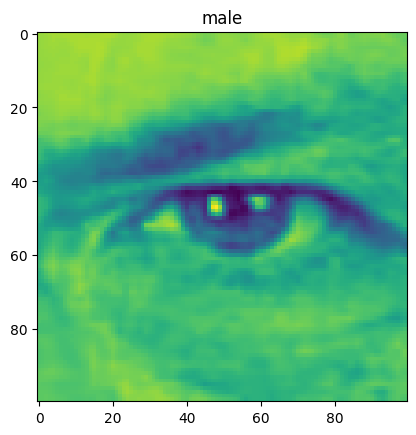

In [21]:
plt.imshow(train_im[5].reshape(100,100))
plt.title(a['gender'][5])

In [22]:
X = train_im /255
y = a['gender_cat']

X is a variable that is assigned the value of train_im (presumably an image or set of images) divided by 255. This normalizes the pixel values of the image(s) to be between 0 and 1.
y is a variable that is assigned the value of the 'gender_cat' column of a dataframe called 'a'. This column presumably contains categorical data for the gender of the subject(s) in the corresponding images.

## Building Model & Hyperparameter tuning
Now we are finally ready, and we can train the model.

- Two sets of convolutional and max pooling layers
- A flatten layer
- Two dense layers with dropout
- An output layer
The convolutional and max pooling layers are used to extract features from the input data, and
the dense layers are used for classification.
The dropout layers are used to regularize the model and prevent overfitting.

In [63]:
# define input shape
INPUT_SHAPE = (100,100,1)

# define sequential model
model = tf.keras.models.Sequential()
# define conv-pool layers - set 1
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), strides=(1, 1),
activation='relu', padding='valid', input_shape=INPUT_SHAPE))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# define conv-pool layers - set 2
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1),
activation='relu', padding='valid', input_shape=INPUT_SHAPE))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

# add flatten layer
model.add(tf.keras.layers.Flatten())

# add dense layers with some dropout

model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.3))

# add output layer
model.add(tf.keras.layers.Dense(2, activation='sigmoid'))

# compile model
model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

# view model layers
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 98, 98, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 49, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 47, 47, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 16928)             0         
                                                                 
 dense_4 (Dense)             (None, 256)              

## Validate the model

This code is training a model (presumably a neural network) on the data stored in the variables X and y.

The number of training iterations, or "epochs," is set to 10.
The code also sets up an early stopping callback, which monitors the validation loss and stops training when the loss stops decreasing for 3 consecutive epochs.
This early stopping callback also restores the model's weights from the epoch with the best validation loss.

The model is being trained using mini-batch gradient descent with a batch size of 5.
The training data is also split into training and validation sets, with 20% of the data being used for validation.
The verbose parameter is set to 1, which means that the training progress will be displayed.

In [64]:
EPOCHS = 10

es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
patience=3,
restore_best_weights=True,
verbose=1)
history = model.fit(X,
y,
batch_size=5, #(mini-batch gradient descent with a batch size of 5)
callbacks=[es_callback],
validation_split=0.2,
epochs=EPOCHS,verbose =1)

Epoch 1/10
1476/1476 [==============================] - 138s 93ms/step - loss: 0.5086 - accuracy: 0.7560 - val_loss: 0.3737 - val_accuracy: 0.8362
Epoch 2/10
1476/1476 [==============================] - 136s 92ms/step - loss: 0.3793 - accuracy: 0.8388 - val_loss: 0.3344 - val_accuracy: 0.8590
Epoch 3/10
1476/1476 [==============================] - 134s 91ms/step - loss: 0.3094 - accuracy: 0.8739 - val_loss: 0.3105 - val_accuracy: 0.8747
Epoch 4/10
1476/1476 [==============================] - 148s 100ms/step - loss: 0.2558 - accuracy: 0.8959 - val_loss: 0.2765 - val_accuracy: 0.8850
Epoch 5/10
1476/1476 [==============================] - 143s 97ms/step - loss: 0.2152 - accuracy: 0.9143 - val_loss: 0.2797 - val_accuracy: 0.8975
Epoch 6/10
1476/1476 [==============================] - 147s 100ms/step - loss: 0.1831 - accuracy: 0.9279 - val_loss: 0.2950 - val_accuracy: 0.8905
Epoch 7/10
1476/1476 [==============================] - 145s 98ms/step - loss: 0.1498 - accuracy: 0.9418 - val_loss:

## Predict The Output For Testing Dataset
We have trained our model, evaluated it and now finally we will predict the output/target for the testing data (i.e. Test.csv).

#### Load Test Set
Load the test data on which final submission is to be made.

In [65]:
test_labels = pd.read_csv("content/eye_gender_data/Testing_set.csv") # loading the labels
file_paths2 = [[fname2, 'content/eye_gender_data/test/' + fname2] for fname2 in test_labels['filename']]
images_test = pd.DataFrame(file_paths, columns=['filename', 'filepaths'])
test_data = pd.merge(images_test, test_labels, how = 'inner', on = 'filename')

data_test = [] # initialize an empty numpy array
image_size = 100 # image size taken is 100 here. one can take other size too
for i in range(test_data.shape[0]):

    img_array_test = cv2.imread(test_data['filepaths'][i], cv2.IMREAD_GRAYSCALE) # converting the image to gray scale

    new_img_array_test = cv2.resize(img_array_test, (image_size, image_size)) # resizing the image array
    data_test.append([new_img_array_test])

## Data Pre-processing on test_data

In [66]:
test_image = np.array(data_test,dtype='uint8')
test_image.shape

(2305, 1, 100, 100)

"uint8" stands for "unsigned integer 8 bits", and it is a data type used to represent integers in programming languages.
In the context of image processing, it is used to represent the intensity values of pixels in an image, where each pixel is represented by 8 bits (1 byte) of data.
This data type can represent integers in the range of 0 to 255, and it is typically used to store image data, where each pixel value corresponds to an intensity value between 0 and 255.

In [67]:
test_image = test_image.reshape(2305,100,100,1)

In [68]:
print(test_image.shape)
print(test_image.dtype)

(2305, 100, 100, 1)
uint8


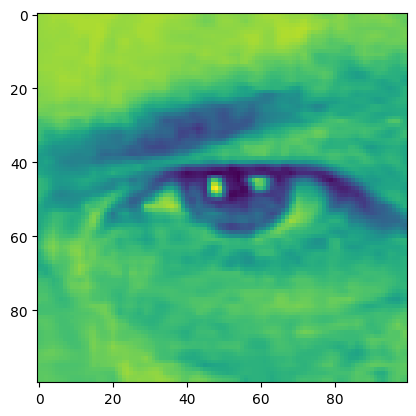

In [69]:
plt.imshow(test_image[5].reshape(100,100));

In [70]:
test_norm = test_image / 255

### Make Prediction on Test Dataset
Time to make a submission!!!

In [71]:
prediction_final = model.predict(test_norm)
prediction_final[:5]

73/73 [==============================] - 4s 48ms/step


array([[0.07219873, 0.95942354],
       [0.9372863 , 0.0404053 ],
       [0.777417  , 0.2562721 ],
       [0.8680295 , 0.12937716],
       [0.10770761, 0.9013183 ]], dtype=float32)

In [72]:
prediction_final_label = np.argmax(prediction_final,axis=1)
submission_final=pd.DataFrame({'filename':test_labels['filename'], 'label_num':prediction_final_label})

submission_final["label"] = labelencoder.inverse_transform(submission_final['label_num'])
submission_final = submission_final[['filename','label']]
submission_final.to_csv('submission.csv', index = False)
print(submission_final.head())

      filename   label
0  Image_1.jpg    male
1  Image_2.jpg  female
2  Image_3.jpg  female
3  Image_4.jpg  female
4  Image_5.jpg    male


This code is generating a final prediction for a set of test data and creating a submission file for it.

prediction_final is a 2D array of the final predictions, where each row represents a sample, and each column represents a class.
np.argmax(prediction_final,axis=1) is used to get the class label with the highest probability for each sample. It returns an array of class labels.

A dataframe submission_final is created with two columns 'filename' which is populated with test_labels['filename'] and 'label_num' which is populated with the predicted class labels.

Then submission_final["label"] is populated by converting the 'label_num' column using the labelencoder's inverse_transform method. The inverse_transform method maps the encoded labels back to their original class labels.

Finally, the dataframe is reorganized and saved as a csv file named 'submission.csv' with the columns 'filename' and 'label' and the index is set to False.
And the first 5 rows of the dataframe are printed with the print(submission_final.head()) command.